In [1]:
import pandas as pd


In [3]:
# Reload the datasets
train_path = "/content/train .csv"
test_path = "/content/test.csv"

# Read CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display basic info
train_df.info(), test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9840 non-null   int64 
 1   Tweet   9840 non-null   object
 2   Label   9840 non-null   object
dtypes: int64(1), object(2)
memory usage: 230.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2109 non-null   int64 
 1   Tweet   2109 non-null   object
 2   Label   2109 non-null   object
dtypes: int64(1), object(2)
memory usage: 49.6+ KB


(None, None)

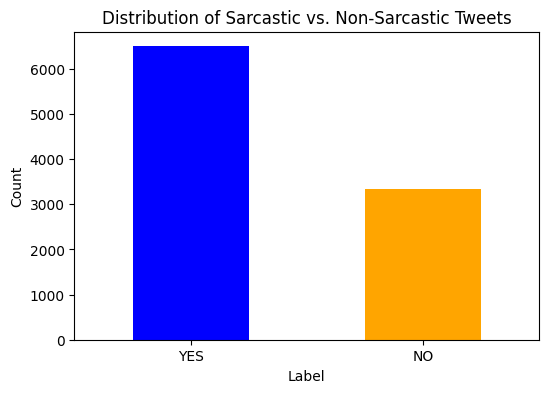

,count
Label,
YES,6495
NO,3345


In [4]:
import matplotlib.pyplot as plt

# Count of each label
label_counts = train_df['Label'].value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution of Sarcastic vs. Non-Sarcastic Tweets")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display counts
label_counts


In [5]:
import re

def clean_text(text):
    """Function to clean Hinglish text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@user)
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning
train_df['Cleaned_Tweet'] = train_df['Tweet'].apply(clean_text)

# Show some cleaned examples
train_df[['Tweet', 'Cleaned_Tweet']].head()


,Tweet,Cleaned_Tweet
0,ussase jayada dukhad congress ka nichi koti ki...,ussase jayada dukhad congress ka nichi koti ki...
1,takeout burrito shielded from cold as though i...,takeout burrito shielded from cold as though i...
2,sight of coworkers' stupid fucking faces endur...,sight of coworkers stupid fucking faces endure...
3,TIL that @RayuduAmbati is ek number ka chootiy...,til that is ek number ka chootiya ambatirayudu...
4,porch ceded to bats,porch ceded to bats


In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Define Hinglish stopwords (custom list since NLTK doesn’t have Hinglish stopwords)
hinglish_stopwords = set(["ka", "ki", "ke", "hai", "h", "ye", "wo", "or", "jo", "ko", "se", "bhi", "to", "me", "main", "tum", "kya", "nahi", "bhai", "ab", "lekin", "haan", "na", "kuch"])

def preprocess_text(text):
    """Tokenization + Stopword Removal"""
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in hinglish_stopwords]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing
train_df['Processed_Tweet'] = train_df['Cleaned_Tweet'].apply(preprocess_text)

# Show some processed examples
train_df[['Cleaned_Tweet', 'Processed_Tweet']].head()


,Cleaned_Tweet,Processed_Tweet
0,ussase jayada dukhad congress ka nichi koti ki...,ussase jayada dukhad congress nichi koti polit...
1,takeout burrito shielded from cold as though i...,takeout burrito shielded from cold as though i...
2,sight of coworkers stupid fucking faces endure...,sight of coworkers stupid fucking faces endure...
3,til that is ek number ka chootiya ambatirayudu...,til that is ek number chootiya ambatirayudu cr...
4,porch ceded to bats,porch ceded bats


In [8]:
def preprocess_text_fixed(text):
    """Tokenization + Stopword Removal (without NLTK dependency)"""
    tokens = text.split()  # Simple tokenization using split()
    tokens = [word for word in tokens if word not in hinglish_stopwords]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing
train_df['Processed_Tweet'] = train_df['Cleaned_Tweet'].apply(preprocess_text_fixed)

# Show some processed examples
train_df[['Cleaned_Tweet', 'Processed_Tweet']].head()


,Cleaned_Tweet,Processed_Tweet
0,ussase jayada dukhad congress ka nichi koti ki...,ussase jayada dukhad congress nichi koti polit...
1,takeout burrito shielded from cold as though i...,takeout burrito shielded from cold as though i...
2,sight of coworkers stupid fucking faces endure...,sight of coworkers stupid fucking faces endure...
3,til that is ek number ka chootiya ambatirayudu...,til that is ek number chootiya ambatirayudu cr...
4,porch ceded to bats,porch ceded bats


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Unigrams & bigrams

# Fit and transform the processed text
X_tfidf = tfidf_vectorizer.fit_transform(train_df['Processed_Tweet'])

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Show a sample of TF-IDF features
tfidf_df.head()


,10,100,11,15,17,18,1st,20,2017,2019,...,zaroori,zero,zinda,zindabad,zindagi,zindagi nai,zone,zoo,zuckerberg,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert labels to binary (1 = YES, 0 = NO)
train_df['Label'] = train_df['Label'].map({'YES': 1, 'NO': 0})

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, train_df['Label'], test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.9588414634146342,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.93      0.94       672\n           1       0.96      0.98      0.97      1296\n\n    accuracy                           0.96      1968\n   macro avg       0.96      0.95      0.95      1968\nweighted avg       0.96      0.96      0.96      1968\n')

In [11]:
import pandas as pd

# Extract classification report as a dictionary
classification_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
classification_df = pd.DataFrame(classification_dict).T

# Round values to 2 decimal places and rename index for clarity
classification_df = classification_df.round(2).rename(index={'0': 'Non-Sarcastic (0)', '1': 'Sarcastic (1)', 'accuracy': 'Overall Accuracy'})

# Display the table
classification_df


,precision,recall,f1-score,support
Non-Sarcastic (0),0.95,0.93,0.94,672.00
Sarcastic (1),0.96,0.98,0.97,1296.00
Overall Accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.95,0.95,1968.00
weighted avg,0.96,0.96,0.96,1968.00


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, train_df['Label'], test_size=0.2, random_state=42)

# Initialize and train SVM model
svm_model = SVC(kernel='linear')  # Linear kernel works best for text classification
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert classification report to DataFrame for better visualization
classification_df_svm = pd.DataFrame(classification_rep_svm).T.round(2)

# Rename index for better readability
classification_df_svm.rename(index={'0': 'Non-Sarcastic (0)', '1': 'Sarcastic (1)', 'accuracy': 'Overall Accuracy'}, inplace=True)


# Display results
accuracy_svm, classification_df_svm


(0.9684959349593496,
                    precision  recall  f1-score  support
 Non-Sarcastic (0)       0.96    0.95      0.95   672.00
 Sarcastic (1)           0.97    0.98      0.98  1296.00
 Overall Accuracy        0.97    0.97      0.97     0.97
 macro avg               0.97    0.96      0.96  1968.00
 weighted avg            0.97    0.97      0.97  1968.00)

In [13]:
pip install tensorflow


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['Processed_Tweet'])
X_sequences = tokenizer.texts_to_sequences(train_df['Processed_Tweet'])
X_padded = pad_sequences(X_sequences, maxlen=50, padding='post', truncating='post')


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization - Convert words to integer indices
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  # Limit vocab size to 5000 words
tokenizer.fit_on_texts(train_df['Processed_Tweet'])

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(train_df['Processed_Tweet'])

# Padding sequences to ensure uniform length
X_padded = pad_sequences(X_sequences, maxlen=50, padding='post', truncating='post')  # Max length = 50 words

# Show an example of tokenized & padded sequences
X_padded[:5]


array([[   1, 3855, 4795,  159,    1,    1,    3,  121, 1553,  657,    7,
           1,    6,  913, 3856, 2704, 2704,  147,   64,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [3193,    1,    1,   31, 2335,   48, 3857,   52,  699,    1, 3194,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [2705,    2, 1113, 2706,  363, 2070,    1, 1114,  380,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),  # Word embeddings
    LSTM(64, return_sequences=False),  # LSTM layer with 64 units
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_padded, train_df['Label'], epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on test data
loss, accuracy = model.evaluate(X_padded, train_df['Label'])
print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


246/246 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step - accuracy: 0.6869 - loss: 0.5793 - val_accuracy: 0.6733 - val_loss: 0.6323
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.6615 - loss: 0.6405 - val_accuracy: 0.6733 - val_loss: 0.6367
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6445 - loss: 0.6521 - val_accuracy: 0.6733 - val_loss: 0.6278
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7576 - loss: 0.4846 - val_accuracy: 0.8394 - val_loss: 0.3574
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9342 - loss: 0.1976 - val_accuracy: 0.9533 - val_loss: 0.1593
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9747 - loss: 0.0879 - val_accuracy: 0.9548 - val_loss: 0.1460
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9824 - loss: 0.0750 - val_accuracy: 0.9599 - val_loss: 0.1514
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9896 - loss: 0.0471 - val_accuracy

In [18]:
print(test_df.columns)


Index(['ID', 'Tweet', 'Label'], dtype='object')


In [20]:
# Convert test labels to binary format
test_df['Label'] = test_df['Label'].map({'YES': 1, 'NO': 0})

# Now evaluate
test_accuracy = accuracy_score(test_df['Label'], y_test_pred)
test_report = classification_report(test_df['Label'], y_test_pred)

print(f"LSTM Model Test Accuracy: {test_accuracy:.4f}")
print(test_report)


LSTM Model Test Accuracy: 0.9583
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       706
           1       0.97      0.97      0.97      1403

    accuracy                           0.96      2109
   macro avg       0.95      0.95      0.95      2109
weighted avg       0.96      0.96      0.96      2109



In [21]:
# Load and preprocess test data
test_df['Cleaned_Tweet'] = test_df['Tweet'].apply(clean_text)
test_df['Processed_Tweet'] = test_df['Cleaned_Tweet'].apply(preprocess_text_fixed)

# Convert test data to sequences
X_test_sequences = tokenizer.texts_to_sequences(test_df['Processed_Tweet'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post', truncating='post')

# Make predictions on test data
y_test_pred = model.predict(X_test_padded)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Evaluate model performance on test set
from sklearn.metrics import accuracy_score, classification_report

test_accuracy = accuracy_score(test_df['Label'], y_test_pred)
test_report = classification_report(test_df['Label'], y_test_pred)

print(f"LSTM Model Test Accuracy: {test_accuracy:.4f}")
print(test_report)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
LSTM Model Test Accuracy: 0.9583
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       706
           1       0.97      0.97      0.97      1403

    accuracy                           0.96      2109
   macro avg       0.95      0.95      0.95      2109
weighted avg       0.96      0.96      0.96      2109



In [23]:
model.save("lstm_sarcasm_model.keras")  # New format



In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = tf.keras.models.load_model("lstm_sarcasm_model.keras")
  # Ensure the correct path

# Function to preprocess input text
def preprocess_input_text(text):
    text = clean_text(text)  # Apply the same text cleaning function
    text = preprocess_text_fixed(text)  # Tokenize & remove stopwords
    sequence = tokenizer.texts_to_sequences([text])  # Convert to numbers
    padded_sequence = pad_sequences(sequence, maxlen=50, padding='post', truncating='post')
    return padded_sequence

# Function to predict sarcasm
def predict_sarcasm(text):
    processed_text = preprocess_input_text(text)
    prediction = model.predict(processed_text)[0][0]
    return "Sarcastic 😏" if prediction > 0.5 else "Not Sarcastic 😊"

# Example usage
while True:
    user_input = input("Enter a sentence (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        break
    print(f"Prediction: {predict_sarcasm(user_input)}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Enter a sentence (or type 'exit' to quit): Wah! Kya amazing traffic hai 😑
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Prediction: Sarcastic 😏
Enter a sentence (or type 'exit' to quit): Silence is golden. Duct tape is silver
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction: Sarcastic 😏
Enter a sentence (or type 'exit' to quit): Aaj ka din bahut accha tha, maza aaya!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: Not Sarcastic 😊
Enter a sentence (or type 'exit' to quit): Bahut hi badhiya! Mera phone phir se hang ho gaya.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Not Sarcastic 😊
Enter a sentence (or type 'exit' to quit): exit
